### 1. Sampling distribution of the mean from repeated samples : 

1. We have a huge population
2. Take a sample from the population and calculate the KPI metric (deposit per player)
3. Calculate Avg. deposit per player
4. Plot it on the graph
5. Repeat 3 & 4 steps, 10k+ times
6. Final plot is a distribution graph

### 2. What is Null Distribution?

✅ Refined Understanding: What is a Null Distribution?
🔍 Purpose
The null distribution represents the distribution of a test statistic (e.g., average deposit per player) under the assumption that the null hypothesis is true.
🧠 Key Concepts
	•	Null Hypothesis (H₀): There’s no difference or effect — e.g., “Group A and Group B have the same average deposit per player.”
	•	Test Statistic: A number summarizing your sample data, such as the difference in means between A and B, or just the mean in one group.
🔁 Generating the Null Distribution
Here’s a corrected step-by-step view:
	1.	Assume the Null Hypothesis is True
— There is no real effect; any difference is due to random chance.
	2.	Take a Large Sample (or Use Actual Sample)
— From your overall population, or pool your A and B groups together (if already split).
	3.	Simulate Many Samples Under H₀
— Randomly shuffle or reassign players to “A” and “B” many times without introducing any actual effect.
	4.	For Each Simulation
	•	Compute the test statistic (e.g., difference in average deposit per player between simulated groups).
	5.	Repeat Thousands of Times (10k+)
	•	You’re building up a distribution of what kinds of results you’d expect by chance alone, if H₀ were true.
	6.	Plot the Distribution
	•	The resulting histogram or curve is the null distribution.
🧪 Use of Null Distribution
	•	You compare your observed result (from the real A/B split) to this null distribution.
	•	The p-value is calculated as:
	The proportion of null simulations that are as extreme or more extreme than your observed result.
✅ Summary
Your version is close, but what you’re describing is more like a sampling distribution of the mean from repeated samples. A null distribution specifically refers to the behavior of a test statistic under the null hypothesis, usually built using simulation (like permutation tests or bootstrapping under H₀).

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


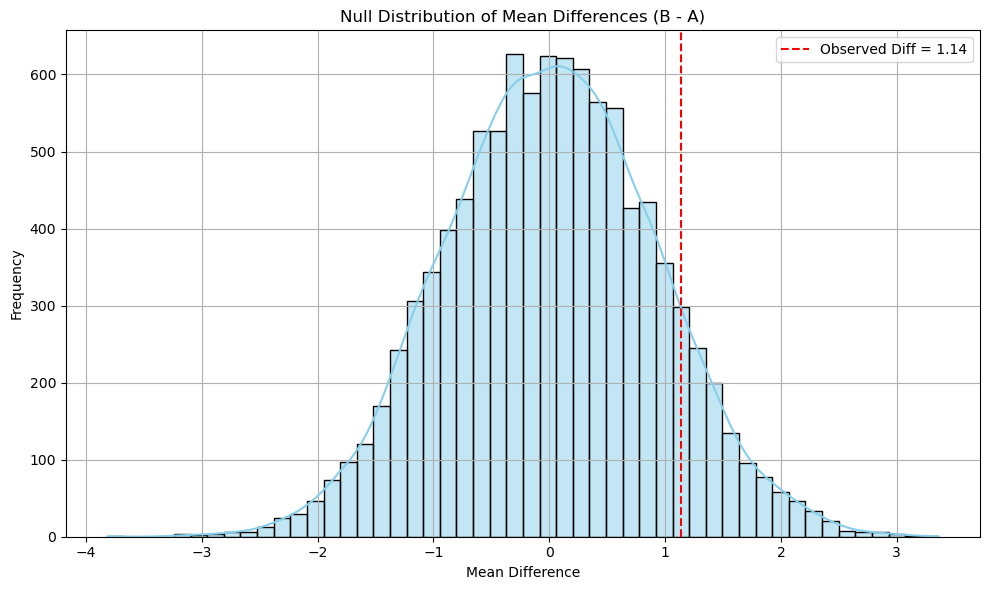

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate deposit data for a population
np.random.seed(42)
population = np.random.normal(loc=100, scale=20, size=100000)  # mean=100, std=20

# Simulate observed groups (A and B)
group_A = np.random.choice(population, 1000, replace=False)
group_B = np.random.choice(population, 1000, replace=False)
observed_diff = group_B.mean() - group_A.mean()

# Generate null distribution by permutation
n_simulations = 10000
null_diffs = []

combined = np.concatenate([group_A, group_B])
for _ in range(n_simulations):
    np.random.shuffle(combined)
    new_A = combined[:1000]
    new_B = combined[1000:]
    diff = new_B.mean() - new_A.mean()
    null_diffs.append(diff)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(null_diffs, kde=True, bins=50, color="skyblue")
plt.axvline(observed_diff, color="red", linestyle="--", label=f'Observed Diff = {observed_diff:.2f}')
plt.title('Null Distribution of Mean Differences (B - A)')
plt.xlabel('Mean Difference')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Here’s the visual of the null distribution of mean differences between groups A and B, assuming the null hypothesis is true (i.e., no real difference between the groups).

🔍 Interpretation:
	•	The blue histogram shows what differences you’d expect just by random chance.
	•	The red dashed line represents the actual observed difference in your experiment.
	•	If the red line is far out in the tails, it suggests that the observed result is unlikely under the null hypothesis — potentially statistically significant.


### 3. Explain how p-value is being calculated?

In [14]:
# Calculate p-value: proportion of simulations more extreme than observed_diff (two-tailed)
null_diffs_array = np.array(null_diffs)
p_value = np.mean(np.abs(null_diffs_array) >= np.abs(observed_diff))
p_value

0.207

#### Theory

Let’s walk through how the p-value is calculated in the context of the A/B test and permutation-based null distribution we just simulated.

🎯 Goal of the p-value
The p-value helps answer the question:
	“If the null hypothesis were true (no real difference), how likely is it to observe a difference as large—or larger—than what we saw in our actual data? If we observe a difference more often, there is a high chance it is random"

🔢 Step-by-Step Breakdown of Calculation

1. Observed Difference (Test Statistic)
	•	We start by computing the actual difference in means between Group B and Group A (during the experiment - final result)
	•	Example: Suppose this was 1.4 units.

2. Create the Null Distribution via Permutation
	•	Combine Group A and B (test and control) into one big group
	•	Shuffle this combined group randomly
	•	Split the shuffled group back into new A and B samples of the same size
	•	Compute the mean difference between these new groups (as if the null hypothesis were true)
	•	Repeat this 10,000+ times to simulate what kinds of mean differences you might get just due to chance

This gives us a distribution of mean differences you’d expect if there were truly no effect

3. Compare Observed to Null Distribution

We now ask:
	How many of those 10,000 simulated differences were as extreme as the observed difference?

Because we’re doing a two-tailed test, we check:

In Python:
p_value = np.mean(np.abs(null_diffs_array) >= np.abs(observed_diff))

This computes:
	•	The proportion of times the simulated mean differences were greater than or equal in magnitude to the observed one (both sides).

✅ In Our Example
	•	Observed difference ≈ 1.4
	•	From the 10,000 null simulations, about 20.7% had a difference in means of ≥ |1.4|
	•	So, p-value = 0.207

📌 Interpretation

Since 0.207 > 0.05, we do not have strong evidence to say the difference is statistically significant.

Would you like to try this with your own data or see how it changes with a larger difference or smaller sample size?